# Descubra quem fez o ENEM 2016 apenas para treino

Neste desafio deverá descobrir quais estudantes estão fazendo a prova apenas para treino.

## Tópicos

Neste desafio você aprenderá:

- Python
- Pandas
- Sklearn
- Regression
- Classification

## Requisitos

Você precisará de python 3.6 (ou superior) e do gerenciador de pacotes pip.

Para instalar os requisitos, execute o comando como no exemplo abaixo:

    pip install -r requirements.txt

## Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `IN_TREINEIRO`.

In [1]:
# Importando libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import re


import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
#Definindo a exibição do dataframe
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [3]:
#definindo o dataset e configurando a coluna index
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [5]:
data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [6]:
test_data.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [7]:
data.head(2)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

In [8]:
# criando target
target = 'IN_TREINEIRO'

## Análise Exporatória de Dados

In [9]:
data = data[test_data.columns.to_list() + [target]]
data.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            13730 non-null  object 
 1   CO_UF_RESIDENCIA        13730 non-null  int64  
 2   SG_UF_RESIDENCIA        13730 non-null  object 
 3   NU_IDADE                13730 non-null  int64  
 4   TP_SEXO                 13730 non-null  object 
 5   TP_COR_RACA             13730 non-null  int64  
 6   TP_NACIONALIDADE        13730 non-null  int64  
 7   TP_ST_CONCLUSAO         13730 non-null  int64  
 8   TP_ANO_CONCLUIU         13730 non-null  int64  
 9   TP_ESCOLA               13730 non-null  int64  
 10  TP_ENSINO               4282 non-null   float64
 11  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 12  IN_BAIXA_VISAO          13730 non-null  int64  
 13  IN_CEGUEIRA             13730 non-null  int64  
 14  IN_SURDEZ               13730 non-null

In [11]:
data.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_TREINEIRO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,2.259692,0.001238,0.0,0.000364,0.000073,0.000073,0.009687,0.000947,0.000146,0.754479,0.754479,0.738747,0.738747,473.495155,529.661087,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0.129862
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.698586,0.035167,0.0,0.019080,0.008534,0.008534,0.097947,0.030757,0.012069,0.431932,0.431932,0.440162,0.440162,71.093674,73.726344,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,0.336163
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,419.900000,480.400000,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,0.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,459.800000,532.000000,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,0.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,514.500000,581.200000,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,0.000000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,806.400000,807.000000,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,1.000000


In [12]:
np.abs(data.corr()['IN_TREINEIRO']).sort_values(ascending=False)[1:]

TP_ST_CONCLUSAO           0.533983
NU_IDADE                  0.295091
TP_ANO_CONCLUIU           0.257710
TP_ESCOLA                 0.244562
TP_PRESENCA_CH            0.094692
                            ...   
IN_DISCALCULIA            0.003297
IN_DISLEXIA               0.003297
TP_ENSINO                      NaN
TP_DEPENDENCIA_ADM_ESC         NaN
IN_CEGUEIRA                    NaN
Name: IN_TREINEIRO, Length: 32, dtype: float64

Pelo 'TP_ST_CONCLUSAO', podemos inferir em quais candidatos estão aptos ou não a prestarem o ENEM, pelo nível de escolaridade.

In [13]:
data['APTO'] = (data['TP_ST_CONCLUSAO'] <= 2) | (data['TP_ST_CONCLUSAO'] == 4)
data['APTO'].head()

0     True
1     True
2    False
3     True
4     True
Name: APTO, dtype: bool

Verificar a conclusão do Ensino Médio.

In [14]:
data['FORMADO'] = data['TP_ANO_CONCLUIU'] > 0

Idade é relevante?

<AxesSubplot:xlabel='NU_IDADE'>

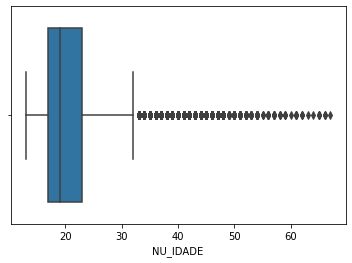

In [15]:
sns.boxplot(data['NU_IDADE'])

<AxesSubplot:xlabel='NU_IDADE'>

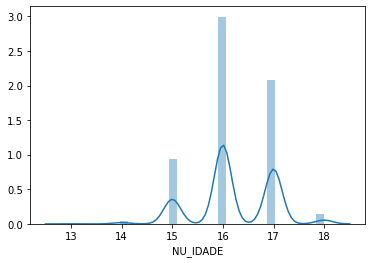

In [16]:
sns.distplot(data.loc[data['IN_TREINEIRO'] == 1, 'NU_IDADE'])

    A idade máxima de treineiros é 18 anos.
    

In [17]:
data['ADULTO'] = data['NU_IDADE'] > 18

In [18]:
features = ['ADULTO','APTO','FORMADO']

<AxesSubplot:>

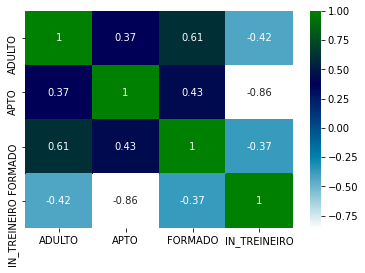

In [19]:
sns.heatmap(data[features +[target]].corr(), annot=True, cmap='ocean_r')

Há correlação nas variáveis. Tem como aplicar uma redução de dimensionalidade.

In [20]:
data[target].mean()

0.12986161689730516

Target é desbalanceada, vamos balancear.

### Criando as bases e aplicando balanceamento.

In [21]:
X = data[features]
y = data[target]

In [22]:
sm = SMOTE()

In [23]:
X_bal, y_bal = sm.fit_resample(X, y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2)

### Aplicando algoritimos 
#### Random Forest

In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2400   39]
 [   0 2340]]
0.9917355371900827


#### Regressão Linear

In [26]:
rl_model = LogisticRegression()
rl_model.fit(X_train, y_train)

y_pred = rl_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2400   39]
 [   0 2340]]
0.9917355371900827


#### KNN (K-Nearest Neighbors)

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2400   39]
 [   0 2340]]
0.9917355371900827


#### Naive Bayes

In [28]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2400   39]
 [   0 2340]]
0.9917355371900827


Utilizei uma votação majoritário combinando os algoritimos para obter uma probabilidade média.

In [29]:
votacao = VotingClassifier(
    [
        ('LogisticReverse', rl_model),
        ('RandomForest', rf_model),
        ('KNeighbors', knn_model),
        ('NaiveBayes', nb_model),
    ],
    voting='soft'
)

In [30]:
# Aplicando o resultado da votação
votacao.fit(X_train, y_train)
y_pred = votacao.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2400   39]
 [   0 2340]]
0.9917355371900827


In [31]:
# Analisando as falhas dos modelos
X_test.loc[y_test != y_pred,].join(data, how='inner', lsuffix='_test')

,ADULTO_test,APTO_test,FORMADO_test,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO,APTO,FORMADO,ADULTO
3915,False,False,False,1f564b5404707c7e20545ee199831559837999ac,26,PE,18,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,429.4,461.5,436.9,0,1.0,100.0,100.0,120.0,120.0,60.0,500.0,C,B,B,A,A,A,NaN,A,0,False,False,False
679,False,False,False,6d96026b68626a2437059b21f1b43f71d3c2b445,23,CE,18,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,469.2,459.2,400.1,1,1.0,40.0,60.0,20.0,20.0,0.0,140.0,A,B,B,A,A,A,NaN,A,0,False,False,False
4770,False,False,False,d77416ec24b26f928fca19f516aedfec57754440,13,AM,18,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,414.1,352.4,371.3,0,1.0,100.0,80.0,80.0,80.0,60.0,400.0,A,A,B,A,A,A,NaN,D,0,False,False,False
9958,False,False,False,d93817bb555fe4cc40dc10788b1a57691aa3ff36,17,TO,18,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,485.3,441.6,418.4,1,1.0,80.0,80.0,80.0,100.0,80.0,420.0,B,B,C,A,A,B,D,A,0,False,False,False
9181,False,False,False,f9ffaecf71b500afb68d1cbca1ffdce199a73b81,24,RN,18,M,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,440.7,533.1,443.1,0,1.0,120.0,80.0,80.0,80.0,80.0,440.0,D,E,C,B,A,A,NaN,A,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,False,False,False,c8c11356b1fb91305122ee73abc860fbc7ea6b2c,27,AL,18,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,389.7,424.2,415.7,1,1.0,120.0,80.0,80.0,80.0,40.0,400.0,D,C,B,A,A,A,NaN,A,0,False,False,False
1560,False,False,False,bfa07a2c4f1ceea51895d22f13c01d00794c9b4e,23,CE,18,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,A,A,C,D,A,0,False,False,False
1780,False,False,False,2322c4f7748f5904fd406fee42c62e0d4c82266a,23,CE,18,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,A,A,A,NaN,A,0,False,False,False
6089,False,False,False,ec5437d4fe5fb179459783bec3ede01ee6d77661,29,BA,18,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,A,B,B,B,D,A,0,False,False,False


A interseção entre os dados balanceados e os dados originais é vazio,sendo assim concluímos que somente os dados artificiais geraram erro.

### Aplicando o modelo na base de test

In [32]:
test_data['APTO'] = (test_data['TP_ST_CONCLUSAO'] <= 2) | (test_data['TP_ST_CONCLUSAO'] == 4)
test_data['FORMADO'] = test_data['TP_ANO_CONCLUIU'] > 0
test_data['ADULTO'] = test_data['NU_IDADE'] > 18
X_test = test_data[features]
X_test

,ADULTO,APTO,FORMADO
0,True,True,True
1,True,True,True
2,False,False,False
3,False,True,False
4,True,True,True
...,...,...,...
4565,False,True,False
4566,True,True,True
4567,True,True,True
4568,True,True,False


In [33]:
y_pred = votacao.predict(X_test)
answer = pd.DataFrame(data={'NU_INSCRICAO':test_data['NU_INSCRICAO'],'IN_TREINEIRO': y_pred}, index=test_data.index)
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [34]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NU_INSCRICAO  4570 non-null   object
 1   IN_TREINEIRO  4570 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 71.5+ KB


In [35]:
answer.shape

(4570, 2)

In [36]:
answer.columns

Index(['NU_INSCRICAO', 'IN_TREINEIRO'], dtype='object')

In [37]:
answer.to_csv('answer.csv', index=False)